<a href="https://colab.research.google.com/github/AlexandraLJones/FIRE-CloudComputing/blob/main/Emma_Basic_graphing_with_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_pickle("/content/gdrive/Shared drives/FIRE-CC/ScrapingLoop/GLOBEobs.pkl")

In [ ]:
#  df

In [ ]:
# Produce some graphs... see what we're working with

In [ ]:
# First I want to try a histogram to see how many observations have differences above a certain fraction
# This will be tricky because we need observations from the same date and time frame
# Then we will need to calculate the cloud fraction differences between the Terra and Aqua observation
# Then we need to classify the difference into its correct bin
# ... OK

# This might be too hard

In [ ]:
# The next graph I want to try is a basic bar graph comparing the averages like in my FIRE177 final project
# 1) Need to delete duplicates
# 2) Calculate averages
# 3) Plot on bar graph to compare

In [ ]:
# Drops duplicates
df = df.drop_duplicates(subset=['Name','Time','Date'])

# Take out Your Observations
satdf = df[(df.Name == 'Aqua') | (df.Name == 'Terra') | (df.Name == 'GEO')]
geodf = df[(df.Name == 'GEO')]
aquadf = df[(df.Name == 'Aqua')]
terradf = df[(df.Name == 'Terra')]


In [ ]:
# Counts how many Aqua, Terra, and GEO observations (just out of curiosity)
count = satdf.groupby('Name').count()
# There are significantly more GEO observations than both Aqua and Terra
# When working with the averages, it should be noted that the margin of error on Aqua and Terra's averages is much larger than on GEO' average
count

,Time,Date,Latitude,Longitude,Total Cloud Cover,Low Cloud Cover,Mid Cloud Cover,High Cloud Cover
Name,,,,,,,,
Aqua,33,33,33,33,33,33,33,33
GEO,151,151,151,151,151,151,151,151
Terra,31,31,31,31,31,31,31,31


In [ ]:
# Calculates average of cloud fractions for total, high, mid, and low levels off all satellites

AllTotalMean = satdf['Total Cloud Cover'].mean()
AllLowMean = satdf['Low Cloud Cover'].mean()
AllMidMean = satdf['Mid Cloud Cover'].mean()
AllHighMean = satdf['High Cloud Cover'].mean()

print(AllTotalMean)
print(AllLowMean)
print(AllMidMean)
print(AllHighMean)


72.63069767441863
21.281441860465105
21.126976744186052
30.222232558139524


In [ ]:
# Calculates average of cloud fractions for total, high, mid, and low levels for GEO

GEOTotalMean = geodf['Total Cloud Cover'].mean()
GEOLowMean = geodf['Low Cloud Cover'].mean()
GEOMidMean = geodf['Mid Cloud Cover'].mean()
GEOHighMean = geodf['High Cloud Cover'].mean()

print(GEOTotalMean)
print(GEOLowMean)
print(GEOMidMean)
print(GEOHighMean)

72.19496688741722
20.798476821192047
22.12072847682119
29.275761589403963


In [ ]:
# Calculates average of cloud fractions for total, high, mid, and low levels for Aqua

AquaTotalMean = aquadf['Total Cloud Cover'].mean()
AquaLowMean = aquadf['Low Cloud Cover'].mean()
AquaMidMean = aquadf['Mid Cloud Cover'].mean()
AquaHighMean = aquadf['High Cloud Cover'].mean()

print(AquaTotalMean)
print(AquaLowMean)
print(AquaMidMean)
print(AquaHighMean)

81.26090909090908
20.873636363636365
12.18878787878788
48.19757575757576


In [ ]:
# Calculates average of cloud fractions for total, high, mid, and low levels for Terra

TerraTotalMean = terradf['Total Cloud Cover'].mean()
TerraLowMean = terradf['Low Cloud Cover'].mean()
TerraMidMean = terradf['Mid Cloud Cover'].mean()
TerraHighMean = terradf['High Cloud Cover'].mean()

print(TerraTotalMean)
print(TerraLowMean)
print(TerraMidMean)
print(TerraHighMean)

65.56612903225808
24.068064516129038
25.801290322580645
15.69741935483871


In [ ]:
# Now that we have computed all of the averages we want to look at, we can create plots to visualize this 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


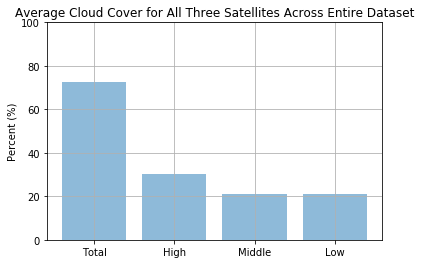

In [ ]:
# Graphs for total

AllTotalMean = satdf['Total Cloud Cover'].mean()
AllLowMean = satdf['Low Cloud Cover'].mean()
AllMidMean = satdf['Mid Cloud Cover'].mean()
AllHighMean = satdf['High Cloud Cover'].mean()

objects = ('Total', 'High', 'Middle', 'Low')
y_pos = np.arange(len(objects))
performance = [AllTotalMean,AllHighMean,AllMidMean,AllLowMean]

ax = plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.grid()
plt.xticks(y_pos, objects)
plt.ylim(0,100)
plt.ylabel('Percent (%)')
plt.title('Average Cloud Cover for All Three Satellites Across Entire Dataset')
    
plt.show()



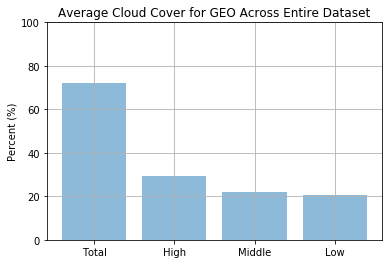

In [ ]:
# Graphs for GEO

objects = ('Total', 'High', 'Middle', 'Low')
y_pos = np.arange(len(objects))
performance = [GEOTotalMean,GEOHighMean,GEOMidMean,GEOLowMean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.grid()
plt.xticks(y_pos, objects)
plt.ylim(0,100)
plt.ylabel('Percent (%)')
plt.title('Average Cloud Cover for GEO Across Entire Dataset')

plt.show()


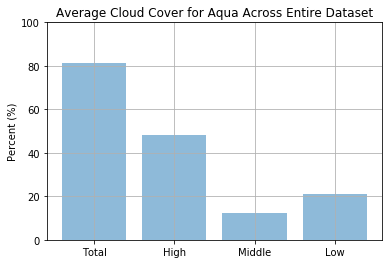

In [ ]:
# Graphs for Aqua

objects = ('Total', 'High', 'Middle', 'Low')
y_pos = np.arange(len(objects))
performance = [AquaTotalMean,AquaHighMean,AquaMidMean,AquaLowMean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.grid()
plt.xticks(y_pos, objects)
plt.ylim(0,100)
plt.ylabel('Percent (%)')
plt.title('Average Cloud Cover for Aqua Across Entire Dataset')

plt.show()

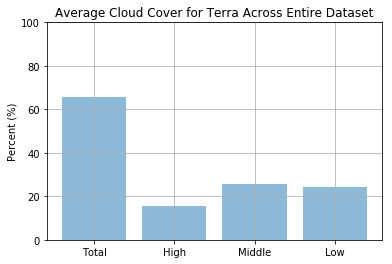

In [ ]:
# Graphs for Terra

objects = ('Total', 'High', 'Middle', 'Low')
y_pos = np.arange(len(objects))
performance = [TerraTotalMean,TerraHighMean,TerraMidMean,TerraLowMean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.grid()
plt.xticks(y_pos, objects)
plt.ylim(0,100)
plt.ylabel('Percent (%)')
plt.title('Average Cloud Cover for Terra Across Entire Dataset')

plt.show()

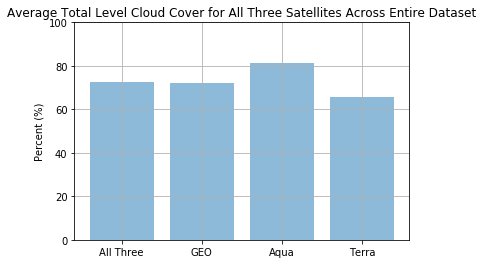

In [ ]:
# Comparing total cloud coverage

objects = ('All Three', 'GEO', 'Aqua', 'Terra')
y_pos = np.arange(len(objects))
performance = [AllTotalMean,GEOTotalMean,AquaTotalMean,TerraTotalMean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.grid()
plt.xticks(y_pos, objects)
plt.ylim(0,100)
plt.ylabel('Percent (%)')
plt.title('Average Total Level Cloud Cover for All Three Satellites Across Entire Dataset')

plt.show()

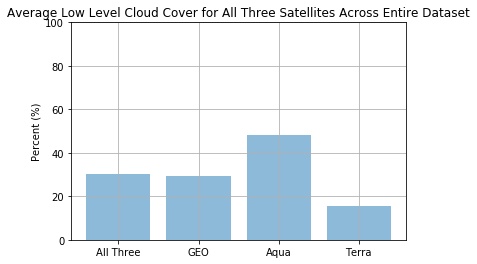

In [ ]:
# Comparing high cloud coverage

objects = ('All Three', 'GEO', 'Aqua', 'Terra')
y_pos = np.arange(len(objects))
performance = [AllHighMean,GEOHighMean,AquaHighMean,TerraHighMean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.grid()
plt.xticks(y_pos, objects)
plt.ylim(0,100)
plt.ylabel('Percent (%)')
plt.title('Average Low Level Cloud Cover for All Three Satellites Across Entire Dataset')

plt.show()

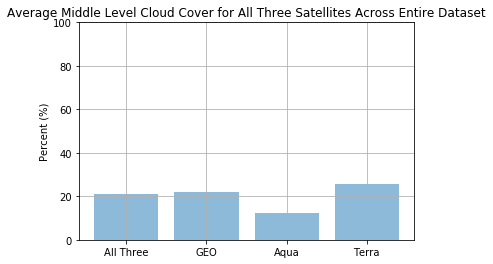

In [ ]:
# Comparing mid cloud coverage

objects = ('All Three', 'GEO', 'Aqua', 'Terra')
y_pos = np.arange(len(objects))
performance = [AllMidMean,GEOMidMean,AquaMidMean,TerraMidMean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.grid()
plt.xticks(y_pos, objects)
plt.ylim(0,100)
plt.ylabel('Percent (%)')
plt.title('Average Middle Level Cloud Cover for All Three Satellites Across Entire Dataset')

plt.show()

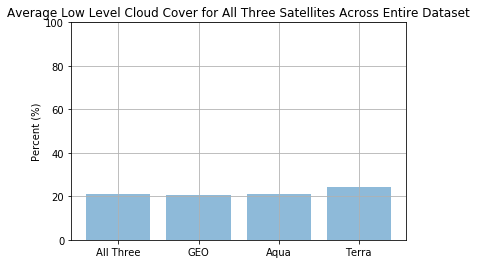

In [ ]:
# Comparing low cloud coverage

objects = ('All Three', 'GEO', 'Aqua', 'Terra')
y_pos = np.arange(len(objects))
performance = [AllLowMean,GEOLowMean,AquaLowMean,TerraLowMean]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.grid()
plt.xticks(y_pos, objects)
plt.ylim(0,100)
plt.ylabel('Percent (%)')
plt.title('Average Low Level Cloud Cover for All Three Satellites Across Entire Dataset')

plt.show()